In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

視覺化heatmap裡面最熱的三個變數('exercised_stock_options', 'salary', 'total_stock_value')
兩個通信ratio

In [61]:
df = pd.read_csv('train_data.csv')
y = df['poi']
df.drop(['name', 'email_address'], axis=1, inplace=True)
df.drop(['loan_advances'], axis=1, inplace=True)
print(df.shape)
df.head(5)

(113, 19)


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [62]:
fin_ratio_cols = ['bonus', 'expenses', 'other', 'salary']

for col in fin_ratio_cols:
    df[col + '_ratio'] = df[col] / df['total_payments']

df['to_poi_ratio'] = df['from_poi_to_this_person'] / df['to_messages']
df['from_poi_ratio'] = df['from_this_person_to_poi'] / df['from_messages']

In [63]:
viz_features = ['exercised_stock_options', 'salary', 'total_stock_value', 'to_poi_ratio', 'from_poi_ratio']

In [64]:
def groupencoder(df, cols):
    df = abs(df)
    for col in cols:
        per_33 = np.nanpercentile(df[col], 33)
        per_66 = np.nanpercentile(df[col], 66)
        
        for index, row in df.iterrows():
            if pd.isnull(row[col]) == False:
                if row[col] > per_66:
                    df.loc[index, col] = 3
                else:
                    if row[col] > per_33:
                        df.loc[index, col] = 2
                    else:
                        df.loc[index, col] = 1
                        
    new_df = df.fillna(0)
    return new_df

In [65]:
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    
    return missing_data
    
miss_ratio_df = na_check(df)
miss_ratio_df

,Missing Ratio
restricted_stock_deferred,91.150442
director_fees,88.495575
deferral_payments,75.221239
deferred_income,69.911504
long_term_incentive,56.637168
bonus_ratio,46.017699
bonus,46.017699
from_poi_to_this_person,42.477876
shared_receipt_with_poi,42.477876
to_poi_ratio,42.477876


In [66]:
df2 = df[viz_features]
df2 = groupencoder(df2, viz_features)

In [67]:
df2 = pd.concat([df2, y], axis=1)
df2.head(5)

,exercised_stock_options,salary,total_stock_value,to_poi_ratio,from_poi_ratio,poi
0,3.0,3.0,3.0,3.0,3.0,True
1,3.0,3.0,3.0,2.0,3.0,True
2,2.0,1.0,3.0,3.0,3.0,True
3,0.0,2.0,2.0,0.0,0.0,True
4,0.0,2.0,1.0,3.0,2.0,True


In [68]:
a = df2.groupby('poi').mean()

<Figure size 720x360 with 0 Axes>

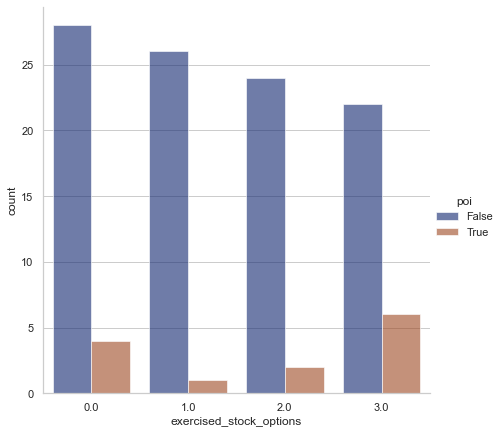

<Figure size 720x360 with 0 Axes>

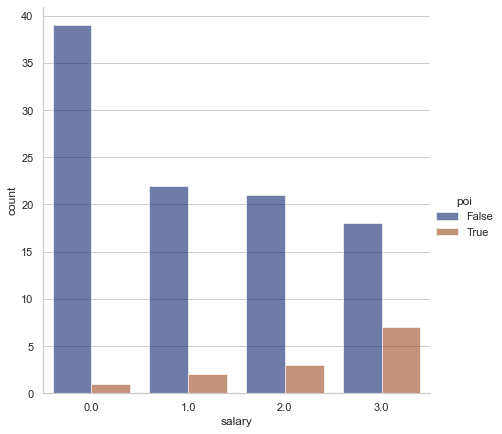

<Figure size 720x360 with 0 Axes>

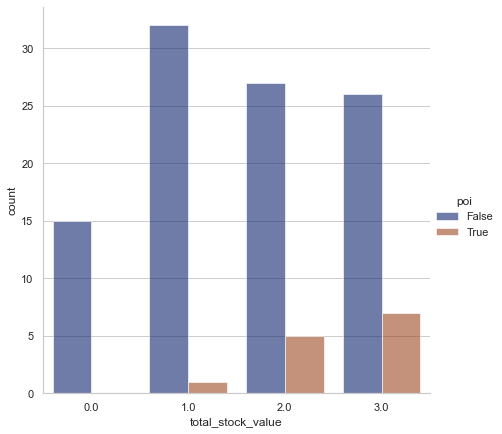

<Figure size 720x360 with 0 Axes>

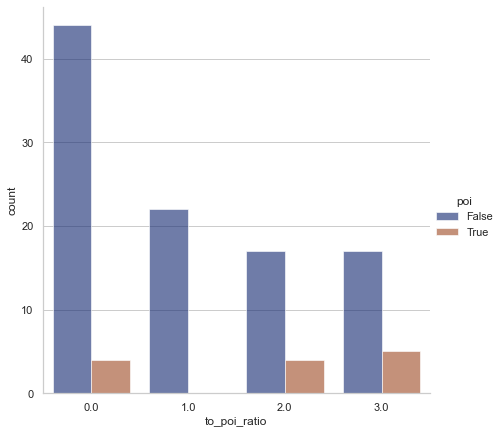

<Figure size 720x360 with 0 Axes>

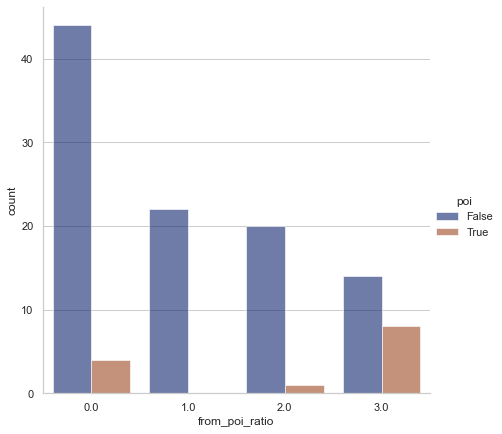

<Figure size 720x360 with 0 Axes>

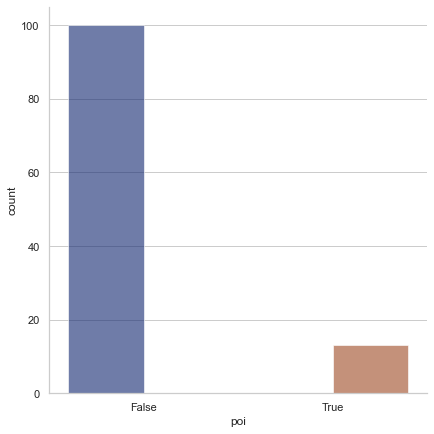

In [69]:
sns.set_theme(style="whitegrid")

for col in df2.columns:
    plt.figure(figsize=(10,5))
    g = sns.catplot(
        data=abs(df2), kind="count",
        x=col, hue="poi",
        ci="sd", palette="dark", alpha=.6, height=6)

<ipython-input-58-4db594bea935>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


<Figure size 720x360 with 0 Axes>

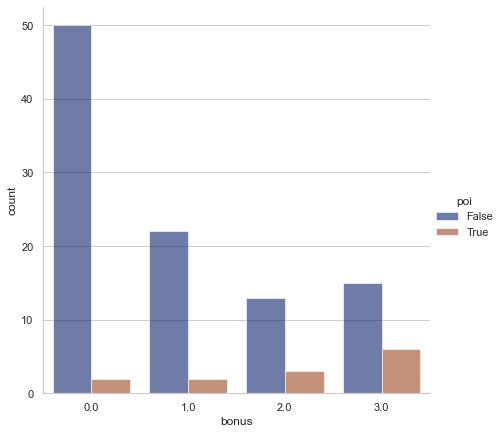

<Figure size 720x360 with 0 Axes>

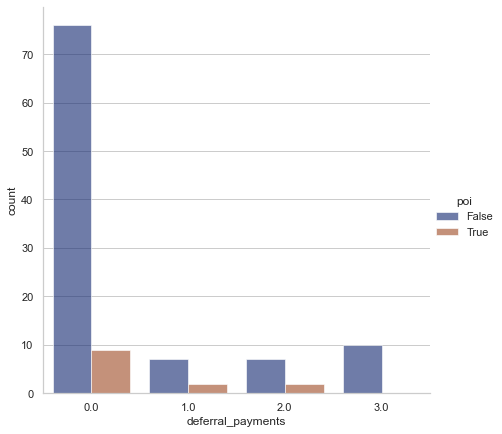

<Figure size 720x360 with 0 Axes>

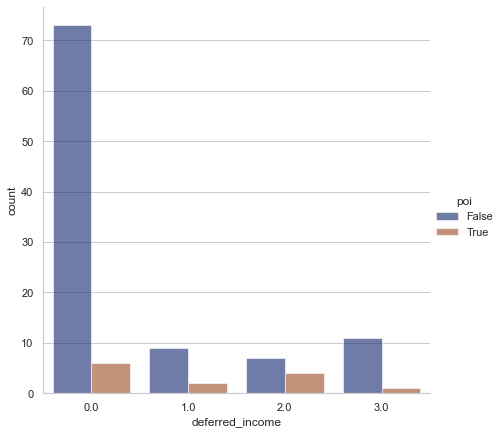

<Figure size 720x360 with 0 Axes>

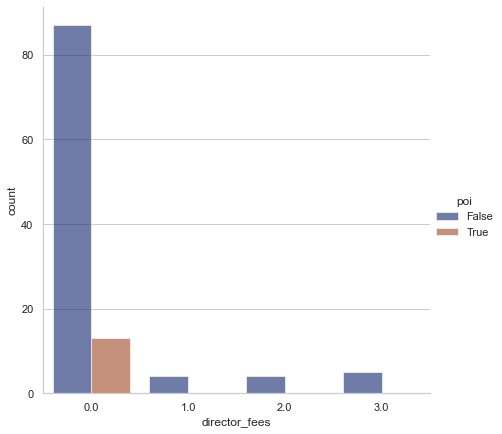

<Figure size 720x360 with 0 Axes>

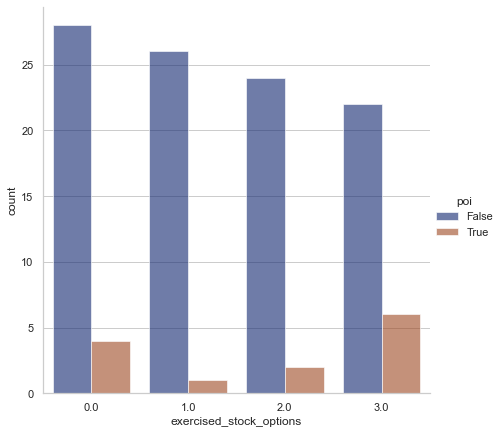

<Figure size 720x360 with 0 Axes>

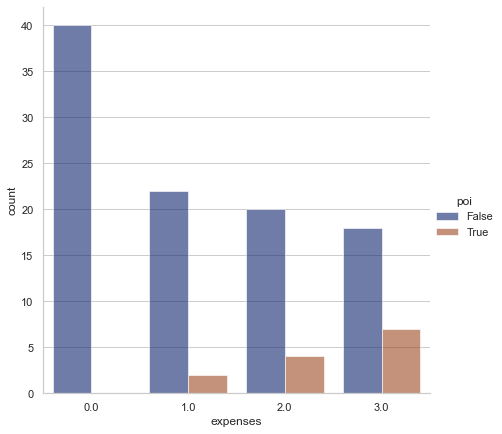

<Figure size 720x360 with 0 Axes>

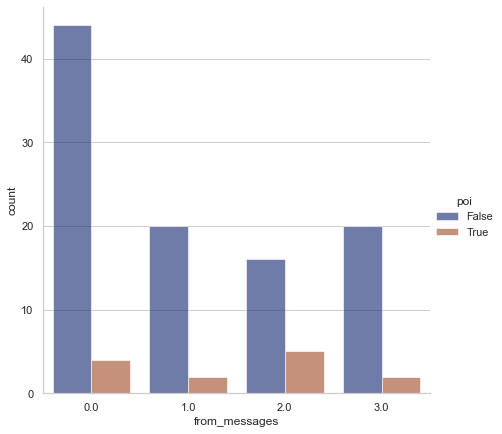

<Figure size 720x360 with 0 Axes>

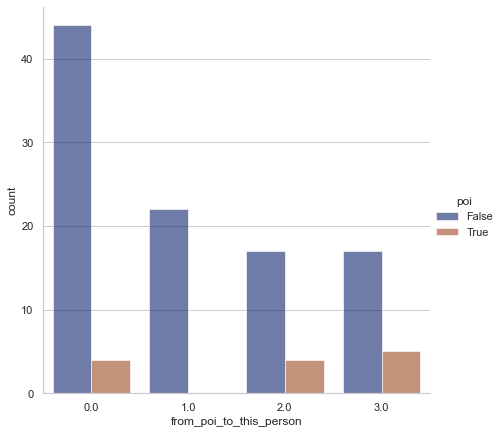

<Figure size 720x360 with 0 Axes>

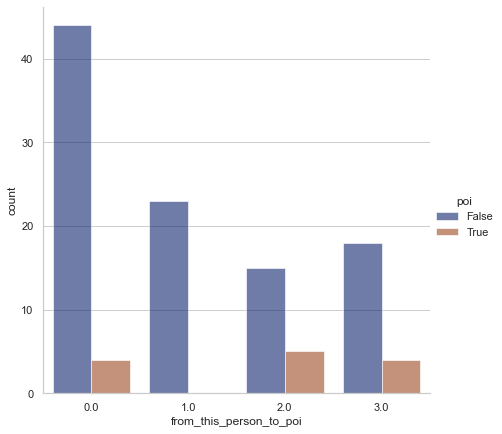

<Figure size 720x360 with 0 Axes>

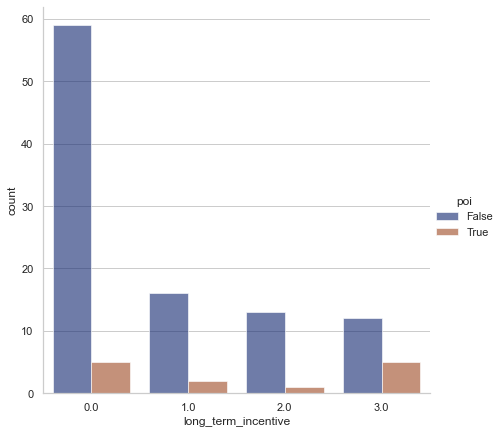

<Figure size 720x360 with 0 Axes>

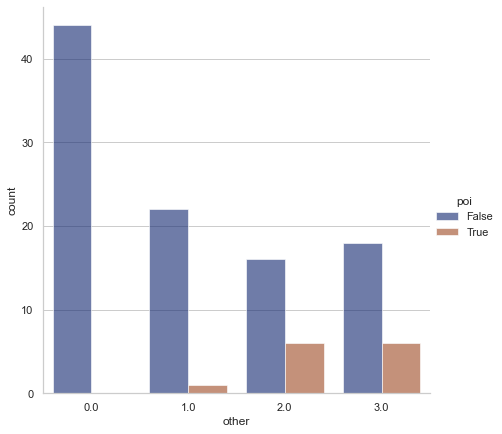

<Figure size 720x360 with 0 Axes>

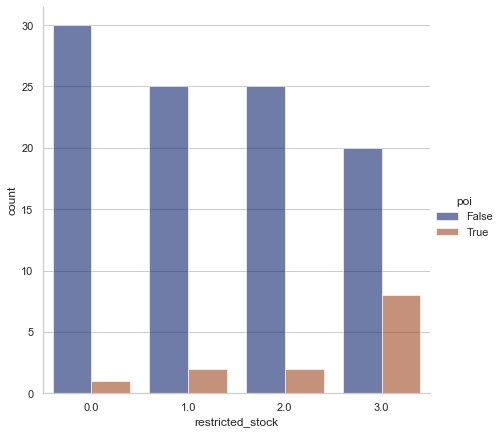

<Figure size 720x360 with 0 Axes>

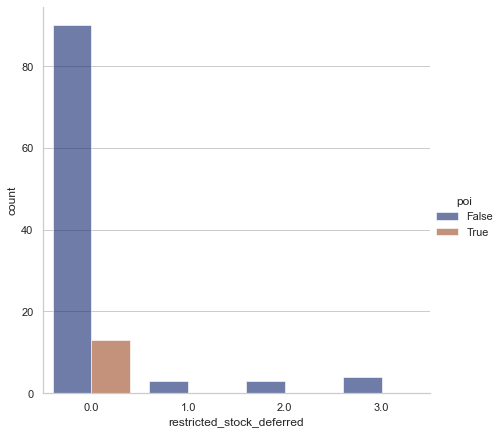

<Figure size 720x360 with 0 Axes>

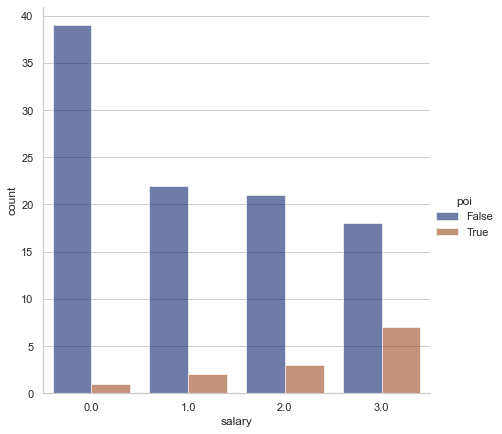

<Figure size 720x360 with 0 Axes>

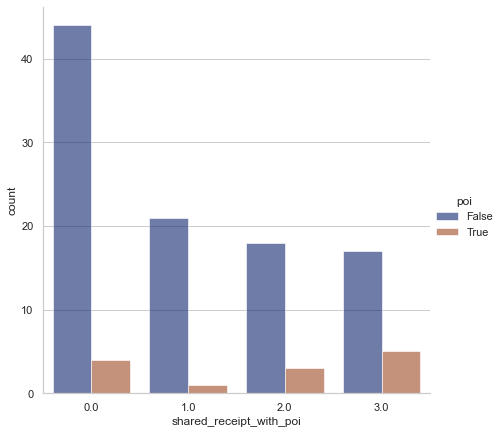

<Figure size 720x360 with 0 Axes>

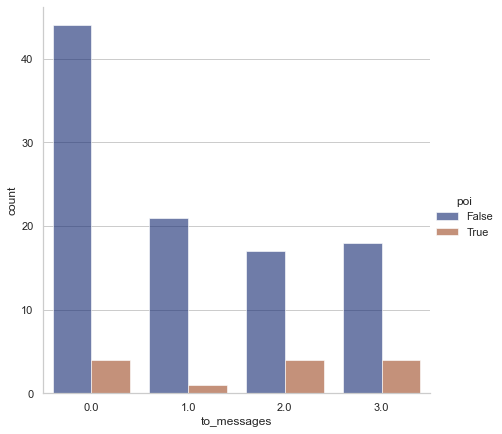

<Figure size 720x360 with 0 Axes>

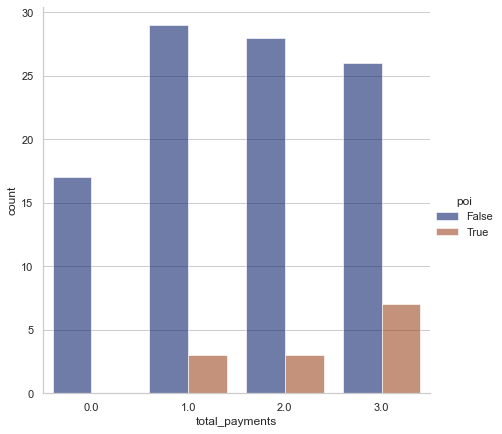

<Figure size 720x360 with 0 Axes>

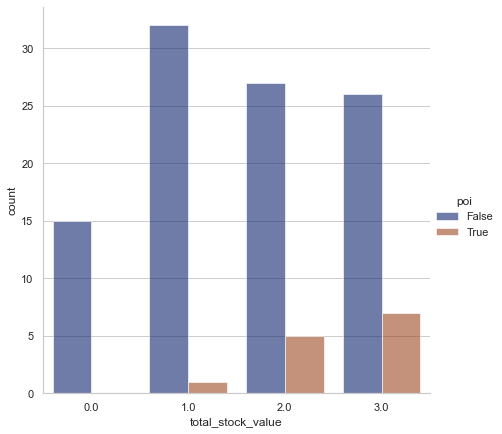

<Figure size 720x360 with 0 Axes>

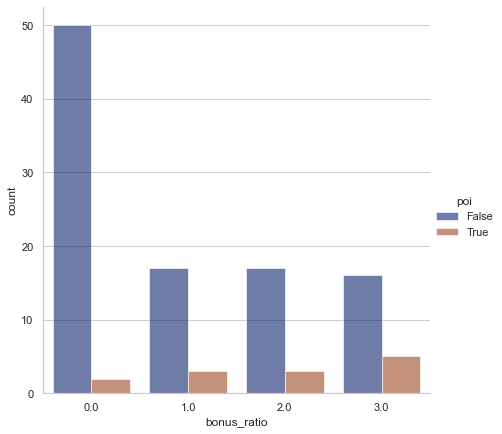

<Figure size 720x360 with 0 Axes>

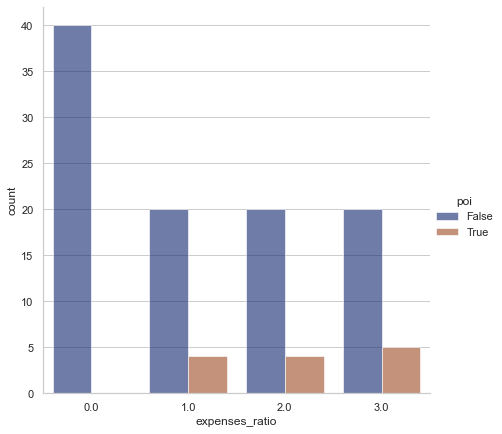

<Figure size 720x360 with 0 Axes>

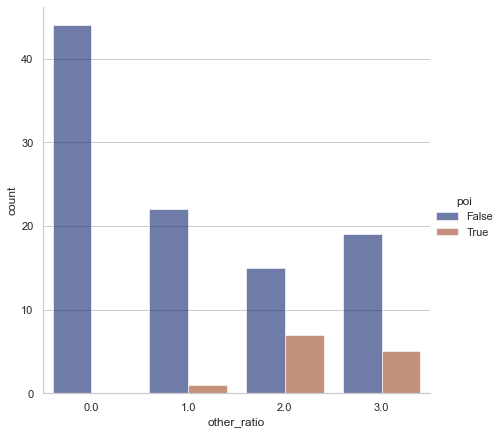

<Figure size 720x360 with 0 Axes>

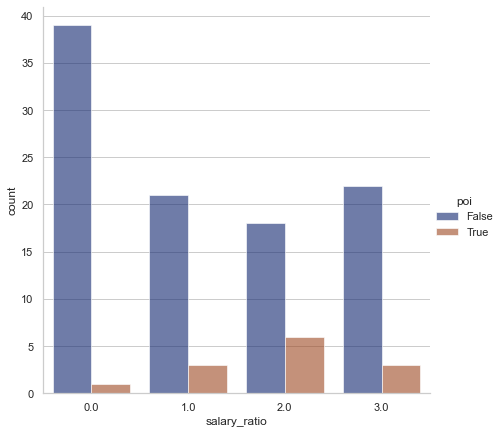

<Figure size 720x360 with 0 Axes>

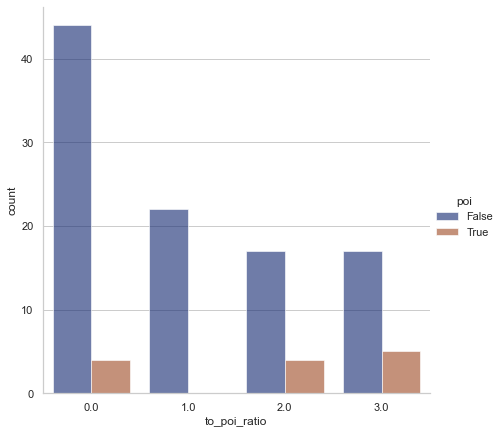

<Figure size 720x360 with 0 Axes>

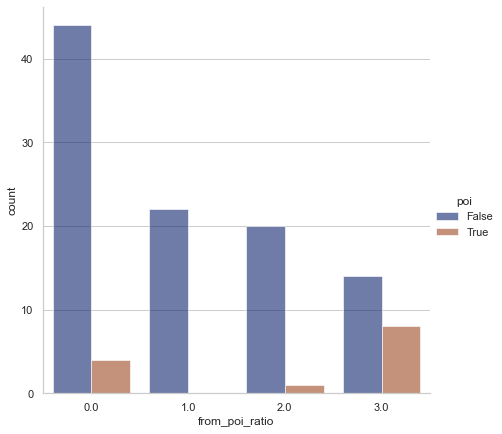

<Figure size 720x360 with 0 Axes>

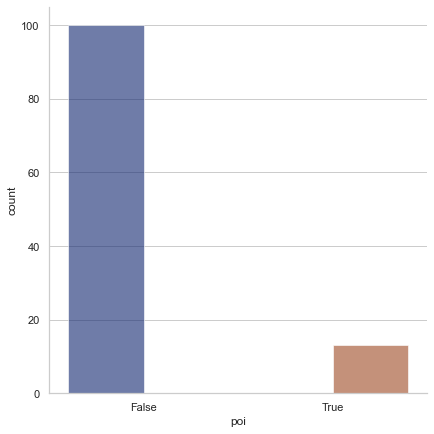

In [58]:
df3 = df.copy()
df3 = df3.drop('poi', axis=1)
df3 = groupencoder(df3, df3.columns)
df3 = pd.concat([df3, y], axis=1)

for col in df3.columns:
    plt.figure(figsize=(10,5))
    g = sns.catplot(
        data=df3, kind="count",
        x=col, hue="poi",
        ci="sd", palette="dark", alpha=.6, height=6)